In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
ames_train_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\ames_regression\ames_train.csv')
ames_test_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\ames_regression\ames_test.csv')

In [3]:
ames_train_data.shape, ames_test_data.shape

((1460, 81), (1459, 80))

In [4]:
pd.set_option('display.max_columns',90)
ames_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Description:

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict for this challenge.

MSSubClass: The building class

20 1-STORY 1946 & NEWER ALL STYLES, 
30 1-STORY 1945 & OLDER, 
40 1-STORY W/FINISHED ATTIC ALL AGES, 
45 1-1/2 STORY - UNFINISHED ALL AGES, 
50 1-1/2 STORY FINISHED ALL AGES, 
60 2-STORY 1946 & NEWER, 
70 2-STORY 1945 & OLDER, 
75 2-1/2 STORY ALL AGES, 
80 SPLIT OR MULTI-LEVEL, 
85 SPLIT FOYER, 
90 DUPLEX - ALL STYLES AND AGES, 
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER, 
150 1-1/2 STORY PUD - ALL AGES, 
160 2-STORY PUD - 1946 & NEWER, 
180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER, 
190 2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A Agriculture, 
C Commercial, 
FV Floating Village Residential, 
I Industrial, 
RH Residential High Density, 
RL Residential Low Density, 
RP Residential Low Density Park, 
RM Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl Gravel, 
Pave Paved

Alley: Type of alley access to property

Grvl Gravel, 
Pave Paved, 
NA No alley access

LotShape: General shape of property

Reg Regular, 
IR1 Slightly irregular, 
IR2 Moderately Irregular, 
IR3 Irregular, 

LandContour: Flatness of the property

Lvl Near Flat/Level, 
Bnk Banked - Quick and significant rise from street grade to building, 
HLS Hillside - Significant slope from side to side, 
Low Depression

Utilities: Type of utilities available

AllPub All public Utilities (E,G,W,& S), 
NoSewr Electricity, Gas, and Water (Septic Tank), 
NoSeWa Electricity and Gas Only, 
ELO Electricity only

LotConfig: Lot configuration

Inside Inside lot, 
Corner Corner lot, 
CulDSac Cul-de-sac, 
FR2 Frontage on 2 sides of property, 
FR3 Frontage on 3 sides of property

LandSlope: Slope of property

Gtl Gentle slope, 
Mod Moderate Slope, 
Sev Severe Slope

Neighborhood: Physical locations within Ames city limits

Blmngtn Bloomington Heights, 
Blueste Bluestem, 
BrDale Briardale, 
BrkSide Brookside, 
ClearCr Clear Creek, 
CollgCr College Creek, 
Crawfor Crawford, 
Edwards Edwards, 
Gilbert Gilbert, 
IDOTRR Iowa DOT and Rail Road, 
MeadowV Meadow Village, 
Mitchel Mitchell, 
Names North Ames, 
NoRidge Northridge, 
NPkVill Northpark Villa, 
NridgHt Northridge Heights, 
NWAmes Northwest Ames, 
OldTown Old Town, 
SWISU South & West of Iowa State University, 
Sawyer Sawyer, 
SawyerW Sawyer West, 
Somerst Somerset, 
StoneBr Stone Brook, 
Timber Timberland, 
Veenker Veenker

Condition1: Proximity to main road or railroad

Artery Adjacent to arterial street, 
Feedr Adjacent to feeder street, 
Norm Normal, 
RRNn Within 200' of North-South Railroad, 
RRAn Adjacent to North-South Railroad, 
PosN Near positive off-site feature--park, greenbelt, etc., 
PosA Adjacent to postive off-site feature, 
RRNe Within 200' of East-West Railroad, 
RRAe Adjacent to East-West Railroad, 
Condition2: Proximity to main road or railroad (if a second is present), 
Artery Adjacent to arterial street, 
Feedr Adjacent to feeder street, 
Norm Normal, 
RRNn Within 200' of North-South Railroad, 
RRAn Adjacent to North-South Railroad, 
PosN Near positive off-site feature--park, greenbelt, etc., 
PosA Adjacent to postive off-site feature, 
RRNe Within 200' of East-West Railroad, 
RRAe Adjacent to East-West Railroad

BldgType: Type of dwelling

1Fam Single-family Detached, 
2FmCon Two-family Conversion; originally built as one-family dwelling, 
Duplx Duplex, 
TwnhsE Townhouse End Unit, 
TwnhsI Townhouse Inside Unit

HouseStyle: Style of dwelling

1Story One story, 
1.5Fin One and one-half story: 2nd level finished, 
1.5Unf One and one-half story: 2nd level unfinished, 
2Story Two story, 
2.5Fin Two and one-half story: 2nd level finished, 
2.5Unf Two and one-half story: 2nd level unfinished, 
SFoyer Split Foyer, 
SLvl Split Level

OverallQual: Overall material and finish quality

10 Very Excellent, 
9 Excellent, 
8 Very Good, 
7 Good, 
6 Above Average, 
5 Average, 
4 Below Average, 
3 Fair, 
2 Poor, 
1 Very Poor

OverallCond: Overall condition rating

10 Very Excellent, 
9 Excellent, 
8 Very Good, 
7 Good, 
6 Above Average, 
5 Average, 
4 Below Average, 
3 Fair, 
2 Poor, 
1 Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

Flat Flat, 
Gable Gable, 
Gambrel Gabrel (Barn), 
Hip Hip, 
Mansard Mansard, 
Shed Shed

RoofMatl: Roof material

ClyTile Clay or Tile, 
CompShg Standard (Composite) Shingle, 
Membran Membrane, 
Metal Metal, 
Roll Roll, 
Tar&Grv Gravel & Tar, 
WdShake Wood Shakes, 
WdShngl Wood Shingles

Exterior1st: Exterior covering on house

AsbShng Asbestos Shingles, 
AsphShn Asphalt Shingles, 
BrkComm Brick Common, 
BrkFace Brick Face, 
CBlock Cinder Block, 
CemntBd Cement Board, 
HdBoard Hard Board, 
ImStucc Imitation Stucco, 
MetalSd Metal Siding, 
Other Other, 
Plywood Plywood, 
PreCast PreCast, 
Stone Stone, 
Stucco Stucco, 
VinylSd Vinyl Siding, 
Wd Sdng Wood Siding, 
WdShing Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

AsbShng Asbestos Shingles, 
AsphShn Asphalt Shingles, 
BrkComm Brick Common, 
BrkFace Brick Face, 
CBlock Cinder Block, 
CemntBd Cement Board, 
HdBoard Hard Board, 
ImStucc Imitation Stucco, 
MetalSd Metal Siding, 
Other Other, 
Plywood Plywood, 
PreCast PreCast, 
Stone Stone, 
Stucco Stucco, 
VinylSd Vinyl Siding, 
Wd Sdng Wood Siding, 
WdShing Wood Shingles

MasVnrType: Masonry veneer type

BrkCmn Brick Common, 
BrkFace Brick Face, 
CBlock Cinder Block, 
None None, 
Stone Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

Ex Excellent, 
Gd Good, 
TA Average/Typical, 
Fa Fair, 
Po Poor

ExterCond: Present condition of the material on the exterior

Ex Excellent, 
Gd Good, 
TA Average/Typical, 
Fa Fair, 
Po Poor

Foundation: Type of foundation

BrkTil Brick & Tile, 
CBlock Cinder Block, 
PConc Poured Contrete, 
Slab Slab, 
Stone Stone, 
Wood Wood

BsmtQual: Height of the basement

Ex Excellent (100+ inches), 
Gd Good (90-99 inches), 
TA Typical (80-89 inches), 
Fa Fair (70-79 inches), 
Po Poor (<70 inches), 
NA No Basement

BsmtCond: General condition of the basement

Ex Excellent, 
Gd Good, 
TA Typical - slight dampness allowed, 
Fa Fair - dampness or some cracking or settling, 
Po Poor - Severe cracking, settling, or wetness, 
NA No Basement

BsmtExposure: Walkout or garden level basement walls

Gd Good Exposure, 
Av Average Exposure (split levels or foyers typically score average or above), 
Mn Mimimum Exposure, 
No No Exposure, 
NA No Basement

BsmtFinType1: Quality of basement finished area

GLQ Good Living Quarters, 
ALQ Average Living Quarters, 
BLQ Below Average Living Quarters, 
Rec Average Rec Room, 
LwQ Low Quality, 
Unf Unfinshed, 
NA No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

GLQ Good Living Quarters, 
ALQ Average Living Quarters, 
BLQ Below Average Living Quarters, 
Rec Average Rec Room, 
LwQ Low Quality, 
Unf Unfinshed, 
NA No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

Floor Floor Furnace, 
GasA Gas forced warm air furnace, 
GasW Gas hot water or steam heat, 
Grav Gravity furnace, 
OthW Hot water or steam heat other than gas, 
Wall Wall furnace

HeatingQC: Heating quality and condition

Ex Excellent, 
Gd Good, 
TA Average/Typical, 
Fa Fair, 
Po Poor

CentralAir: Central air conditioning

N No, 
Y Yes

Electrical: Electrical system

SBrkr Standard Circuit Breakers & Romex, 
FuseA Fuse Box over 60 AMP and all Romex wiring (Average), 
FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair), 
FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor), 
Mix Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

Ex Excellent, 
Gd Good, 
TA Typical/Average, 
Fa Fair, 
Po Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Typ Typical Functionality, 
Min1 Minor Deductions 1, 
Min2 Minor Deductions 2, 
Mod Moderate Deductions, 
Maj1 Major Deductions 1, 
Maj2 Major Deductions 2, 
Sev Severely Damaged, 
Sal Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

Ex Excellent - Exceptional Masonry Fireplace, 
Gd Good - Masonry Fireplace in main level, 
TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement, 
Fa Fair - Prefabricated Fireplace in basement, 
Po Poor - Ben Franklin Stove, 
NA No Fireplace

GarageType: Garage location

2Types More than one type of garage, 
Attchd Attached to home, 
Basment Basement Garage, 
BuiltIn Built-In (Garage part of house - typically has room above garage), 
CarPort Car Port, 
Detchd Detached from home, 
NA No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

Fin Finished, 
RFn Rough Finished, 
Unf Unfinished, 
NA No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

Ex Excellent, 
Gd Good, 
TA Typical/Average, 
Fa Fair, 
Po Poor, 
NA No Garage

GarageCond: Garage condition

Ex Excellent, 
Gd Good, 
TA Typical/Average, 
Fa Fair, 
Po Poor, 
NA No Garage

PavedDrive: Paved driveway

Y Paved, 
P Partial Pavement, 
N Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Ex Excellent, 
Gd Good, 
TA Average/Typical, 
Fa Fair, 
NA No Pool

Fence: Fence quality

GdPrv Good Privacy, 
MnPrv Minimum Privacy, 
GdWo Good Wood, 
MnWw Minimum Wood/Wire, 
NA No Fence

MiscFeature: Miscellaneous feature not covered in other categories

Elev Elevator, 
Gar2 2nd Garage (if not described in garage section), 
Othr Other, 
Shed Shed (over 100 SF), 
TenC Tennis Court, 
NA None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

WD Warranty Deed - Conventional, 
CWD Warranty Deed - Cash, 
VWD Warranty Deed - VA Loan, 
New Home just constructed and sold, 
COD Court Officer Deed/Estate, 
Con Contract 15% Down payment regular terms, 
ConLw Contract Low Down payment and low interest, 
ConLI Contract Low Interest, 
ConLD Contract Low Down, 
Oth Other


In [5]:
ames_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
ames_train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [7]:
na_col = ames_train_data.columns[ames_train_data.isna().any()].to_list()
na_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
missing_data = ames_train_data[na_col]

In [9]:
missing_data['Alley'].fillna('NoAlley', inplace=True)

In [10]:
missing_data['Alley'].value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [11]:
missing_data['MasVnrType'].fillna('None', inplace=True)

In [12]:
missing_data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
missing_data['BsmtQual'].fillna('NoBasement', inplace=True)

In [14]:
missing_data['BsmtQual'].value_counts()

TA            649
Gd            618
Ex            121
NoBasement     37
Fa             35
Name: BsmtQual, dtype: int64

In [15]:
missing_data['BsmtCond'].fillna('NoBasement', inplace=True)

In [16]:
missing_data['BsmtCond'].value_counts()

TA            1311
Gd              65
Fa              45
NoBasement      37
Po               2
Name: BsmtCond, dtype: int64

In [17]:
missing_data['BsmtExposure'].fillna('NoBasement', inplace=True)

In [18]:
missing_data['BsmtExposure'].value_counts()

No            953
Av            221
Gd            134
Mn            114
NoBasement     38
Name: BsmtExposure, dtype: int64

In [19]:
missing_data['BsmtFinType1'].fillna('NoBasement', inplace=True)

In [20]:
missing_data['BsmtFinType1'].value_counts()

Unf           430
GLQ           418
ALQ           220
BLQ           148
Rec           133
LwQ            74
NoBasement     37
Name: BsmtFinType1, dtype: int64

In [21]:
missing_data['BsmtFinType2'].fillna('NoBasement', inplace=True)

In [22]:
missing_data['BsmtFinType2'].value_counts()

Unf           1256
Rec             54
LwQ             46
NoBasement      38
BLQ             33
ALQ             19
GLQ             14
Name: BsmtFinType2, dtype: int64

In [23]:
missing_data['FireplaceQu'].fillna('NoFireplace', inplace=True)

In [24]:
missing_data['FireplaceQu'].value_counts()

NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

In [25]:
missing_data['GarageType'].fillna('NoGarage', inplace=True)

In [26]:
missing_data['GarageType'].value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [27]:
missing_data['GarageFinish'].fillna('NoGarage', inplace=True)

In [28]:
missing_data['GarageFinish'].value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

In [29]:
missing_data['GarageQual'].fillna('NoGarage', inplace=True)

In [30]:
missing_data['GarageQual'].value_counts()

TA          1311
NoGarage      81
Fa            48
Gd            14
Ex             3
Po             3
Name: GarageQual, dtype: int64

In [31]:
missing_data['GarageCond'].fillna('NoGarage', inplace=True)

In [32]:
missing_data['GarageCond'].value_counts()

TA          1326
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: GarageCond, dtype: int64

In [33]:
missing_data['PoolQC'].fillna('None', inplace=True)

In [34]:
missing_data['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [35]:
missing_data['Fence'].fillna('NoFence', inplace=True)

In [36]:
missing_data['Fence'].value_counts()

NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [37]:
missing_data['MiscFeature'].fillna('None', inplace=True)

In [38]:
missing_data['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [39]:
missing_data

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NoAlley,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NoFireplace,Attchd,2003.0,RFn,TA,TA,None,NoFence,None
1,80.0,NoAlley,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,None,NoFence,None
2,68.0,NoAlley,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,None,NoFence,None
3,60.0,NoAlley,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,None,NoFence,None
4,84.0,NoAlley,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,None,NoFence,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NoAlley,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,None,NoFence,None
1456,85.0,NoAlley,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,None,MnPrv,None
1457,66.0,NoAlley,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,None,GdPrv,Shed
1458,68.0,NoAlley,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NoFireplace,Attchd,1950.0,Unf,TA,TA,None,NoFence,None


In [40]:
for col in missing_data.columns:
    ames_train_data[col] = missing_data[col].values

In [41]:
ames_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,NoFence,None,0,12,2008,WD,Normal,250000


In [42]:
na_col = missing_data.columns[missing_data.isna().any()].to_list()
missing_data = ames_train_data[na_col]

In [43]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   Electrical   1459 non-null   object 
 3   GarageYrBlt  1379 non-null   float64
dtypes: float64(3), object(1)
memory usage: 45.8+ KB


In [44]:
na_cat = []
for cols in missing_data.select_dtypes("object"):
    na_cat.append(cols)
    
na_num = []
for cols in missing_data.select_dtypes(["int64", "float64"]):
    na_num.append(cols)

In [45]:
na_cat, na_num

(['Electrical'], ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [46]:
missing_data[na_cat] = missing_data[na_cat].fillna(missing_data.mode().iloc[0])

In [47]:
missing_data['LotFrontage'].fillna(missing_data['LotFrontage'].mean(), inplace=True)
missing_data['MasVnrArea'].fillna(missing_data['MasVnrArea'].mean(), inplace=True)
missing_data['GarageYrBlt'].fillna(missing_data['GarageYrBlt'].median(), inplace=True)

In [48]:
missing_data.isnull().sum()

LotFrontage    0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64

In [49]:
for col in missing_data.columns:
    ames_train_data[col] = missing_data[col].values

In [50]:
ames_train_data.isnull().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 0,
 'LotArea': 0,
 'Street': 0,
 'Alley': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 0,
 'MasVnrArea': 0,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 0,
 'BsmtCond': 0,
 'BsmtExposure': 0,
 'BsmtFinType1': 0,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 0,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 

In [51]:
ames_train_data.drop('Id', axis = 1, inplace=True)

In [52]:
#scaling up features
from sklearn.preprocessing import LabelEncoder

#target column
tgt_col = ['SalePrice']

#categorical columns
category_names = ames_train_data.nunique()[ames_train_data.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

#numerical columns
num_cols = [i for i in ames_train_data.columns if i not in category_names]

#binary columns
bin_cols = ames_train_data.nunique()[ames_train_data.nunique()==2].keys().tolist()

#multi-columns
multi_cols = [i for i in category_names if i not in bin_cols]

#Label Encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    ames_train_data[i] = le.fit_transform(ames_train_data[i])

#duplicating cols for multi-value columns
ames_train_data = pd.get_dummies(data=ames_train_data, columns=multi_cols)

In [53]:
cat_col = []
for cols in ames_train_data.select_dtypes("object"):
    cat_col.append(cols)

In [54]:
#label encoding
from sklearn.preprocessing import LabelBinarizer
columns = ames_train_data[cat_col].nunique()[ames_train_data[cat_col].nunique() >= 15].keys().tolist()
#columns = columns.as_array()
encoder = LabelBinarizer()
for i in columns:
    ames_train_data[i] = encoder.fit_transform(ames_train_data[i])

In [55]:
ames_train_data_copy = ames_train_data.copy()

In [56]:
num_cols = []
for cols in ames_train_data.select_dtypes(["int64", "float64"]):
    num_cols.append(cols)
num_cols.remove('SalePrice')

In [57]:
#Normalising Numerical columns
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
ames_train_data[num_cols] = minmax.fit_transform(ames_train_data[num_cols].values)

In [58]:
ames_train_data

,MSSubClass,LotFrontage,LotArea,Street,Utilities,Neighborhood,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_NoAlley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,1,0,0,0.949275,0.883333,0,0,0.122500,0.125089,0.000000,0.064212,0.140098,1,0.119780,0.413559,0.0,0.259231,0.936364,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.00000,208500,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.202055,0.038795,1,0,0,0.753623,0.433333,0,0,0.000000,0.173281,0.000000,0.121575,0.206547,1,0.212942,0.000000,0.0,0.174830,0.690909,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.00000,181500,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.235294,0.160959,0.046507,1,0,0,0.934783,0.866667,0,0,0.101250,0.086109,0.000000,0.185788,0.150573,1,0.134465,0.419370,0.0,0.273549,0.918182,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.00000,223500,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.294118,0.133562,0.038561,1,0,0,0.311594,0.333333,0,0,0.000000,0.038271,0.000000,0.231164,0.123732,1,0.143873,0.366102,0.0,0.260550,0.890909,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.00000,140000,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,1,0,0,0.927536,0.833333,0,0,0.218750,0.116052,0.000000,0.209760,0.187398,1,0.186095,0.509927,0.0,0.351168,0.909091,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.00000,250000,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,1,0,0,0.920290,0.833333,0,0,0.000000,0.000000,0.000000,0.407962,0.155974,1,0.142038,0.336077,0.0,0.247362,0.900000,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.00000,175000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,0.000000,0.219178,0.055505,1,0,0,0.768116,0.633333,0,0,0.074375,0.139972,0.110583,0.252140,0.252373,1,0.399036,0.000000,0.0,0.327619,0.709091,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.00000,210000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,0.294118,0.154110,0.036187,1,0,0,0.500000,0.933333,0,0,0.000000,0.048724,0.000000,0.375428,0.188543,1,0.195961,0.557869,0.0,0.377920,0.372727,0.177715,0.000000,0.109689,0.000000,0.0,

In [59]:
#Model Building for Scaled Data
cols = [i for i in ames_train_data.columns if i not  in tgt_col]
X_scaled = ames_train_data[cols]
Y_scaled = ames_train_data[tgt_col]

#Model Building for Unscaled Data
cols = [i for i in ames_train_data_copy.columns if i not  in tgt_col]
X_unscaled = ames_train_data_copy[cols]
Y_unscaled = ames_train_data_copy[tgt_col]

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [61]:
decision_tree_model = DecisionTreeRegressor(criterion="squared_error", random_state=0)
from sklearn.metrics import r2_score

In [62]:
#using stratified K-Fold Cross Validation to split train and test for scaled data
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X_scaled,Y_scaled):
    print("\n {} of KFold".format(i,folds.n_splits))
    X_scaled_train,X_scaled_test = X_scaled.iloc[train_index],X_scaled.iloc[test_index]
    Y_scaled_train,Y_scaled_test = Y_scaled.iloc[train_index],Y_scaled.iloc[test_index]
    decision_tree_model.fit(X_scaled_train,Y_scaled_train)
    y_scaled_test_pred = decision_tree_model.predict(X_scaled_test)

    print("PERFORMANCE FOR SCALED DATA")
    dt_scores = cross_val_score(decision_tree_model, X_scaled_train, Y_scaled_train, cv=5)
    print("Mean cross validation score: {}".format(np.mean(dt_scores)))
    print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))
    i=i+1


 1 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.6713180505791015
R2-score:  0.6518563356957854

 2 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.6297943004769542
R2-score:  0.7026299443213854

 3 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.6686640982531933
R2-score:  0.7082201511919204

 4 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.6637873973779536
R2-score:  0.6158691567592822

 5 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.6946377629914657
R2-score:  0.7171651446368703

 6 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.7174906335718335
R2-score:  0.43733512014350184

 7 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.7020763374575798
R2-score:  0.7160055288704188

 8 of KFold
PERFORMANCE FOR SCALED DATA
Mean cross validation score: 0.6918847530867877
R2-score:  0.705457206294103

 9 of KFold
PERFORMANCE FOR SCALED DATA
Mean cr

In [63]:
#using stratified K-Fold Cross Validation to split train and test for unscaled data
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X_unscaled,Y_unscaled):
    print("\n {} of KFold".format(i,folds.n_splits))
    X_unscaled_train,X_unscaled_test = X_unscaled.iloc[train_index],X_unscaled.iloc[test_index]
    Y_unscaled_train,Y_unscaled_test = Y_unscaled.iloc[train_index],Y_unscaled.iloc[test_index]
    decision_tree_model.fit(X_unscaled_train,Y_unscaled_train)
    y_unscaled_test_pred = decision_tree_model.predict(X_unscaled_test)

    print("PERFORMANCE FOR UNSCALED DATA")
    dt_scores = cross_val_score(decision_tree_model, X_unscaled_train, Y_scaled_train, cv=5)
    print("Mean cross validation score: {}".format(np.mean(dt_scores)))
    print("R2-score: ",r2_score(Y_unscaled_test, y_unscaled_test_pred))
    i=i+1


 1 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -0.9644970276393142
R2-score:  0.6518563356957854

 2 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -1.1665139035984313
R2-score:  0.7026299443213854

 3 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -1.2611778167612524
R2-score:  0.7081099330887545

 4 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -1.314119346047115
R2-score:  0.6158650959266215

 5 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -1.0175555927546382
R2-score:  0.7154559942130723

 6 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -1.1901292858025727
R2-score:  0.43733512014350184

 7 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -1.169828496890413
R2-score:  0.715678877005319

 8 of KFold
PERFORMANCE FOR UNSCALED DATA
Mean cross validation score: -1.1842103571079832
R2-score:  0.705457206294103

 9 of KFold
PERFORMANCE FO

In [64]:
#Using Grid search to vary parameters and figure out best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10),
                          'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"], 
                          'splitter': ["best", "random"]}, 
                          #'max_depth': np.linspace(1,50,50,endpoint=True)}, 
                          #'min_samples_leaf': np.linspace(10,500,50,endpoint=True),
                          #'max_features': list(range(1,X_scaled_train.shape[1],1))},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_scaled_train, Y_scaled_train)
print(g_cv.best_params_)

result = g_cv.cv_results_
#print(result)
r2_score(Y_scaled_test, g_cv.best_estimator_.predict(X_scaled_test))

{'criterion': 'friedman_mse', 'min_samples_split': 3, 'splitter': 'best'}


0.8224302694784962

In [65]:
#Using Grid search to vary parameters and figure out best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': [3],
                          'criterion': ["friedman_mse"], 
                          'splitter': ["best"], 
                          'max_depth': np.linspace(1,20,20,endpoint=True), 
                          'min_samples_leaf': np.linspace(0.001,0.01,10,endpoint=True)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_scaled_train, Y_scaled_train)
print(g_cv.best_params_)

result = g_cv.cv_results_
#print(result)
r2_score(Y_scaled_test, g_cv.best_estimator_.predict(X_scaled_test))

{'criterion': 'friedman_mse', 'max_depth': 12.0, 'min_samples_leaf': 0.004, 'min_samples_split': 3, 'splitter': 'best'}


0.8330839914104146

#Results:

{'min_samples_split': 9}

{'criterion': 'friedman_mse', 'min_samples_split': 3}

{'criterion': 'friedman_mse', 'min_samples_split': 3, 'splitter': 'best'}

{'criterion': 'friedman_mse', 'max_depth': 7.0, 'min_samples_split': 3, 'splitter': 'best'}

{'criterion': 'friedman_mse', 'max_depth': 12.0, 'min_samples_leaf': 0.004, 'min_samples_split': 3, 'splitter': 'best'}

{'criterion': 'friedman_mse', 'max_depth': 13.0, 'max_features': 204, 'min_samples_leaf': 0.004, 'min_samples_split': 3, 'splitter': 'best'}

0.7807382432248628

,0
GarageCars_3,0.367434
GrLivArea,0.194231
BsmtQual_Ex,0.060571
ExterQual_TA,0.046841
2ndFlrSF,0.041635
1stFlrSF,0.039932
TotalBsmtSF,0.036501
YearRemodAdd,0.030182
BsmtFinSF1,0.027417
GarageCars_2,0.010639


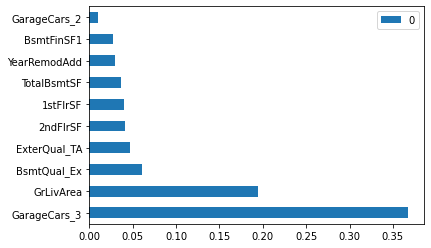

In [66]:
feat_importances = pd.DataFrame(decision_tree_model.feature_importances_, index=X_scaled_train.columns)
feat_importances = feat_importances.sort_values(by=0, ascending=False)
feat_importances.head(10).plot(kind='barh')
feat_importances.head(10)

R2score:  -0.036059969884534304


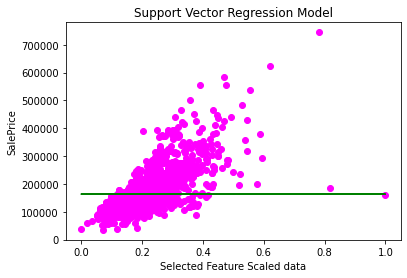

In [67]:
#Using SVM Regressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

#Y_scaled_train = Y_scaled_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

svr = SVR()
svr.fit(X_scaled_train, Y_scaled_train)
y_scaled_test_pred = svr.predict(X_scaled_test)
y_scaled_train_pred = svr.predict(X_scaled_train)

print("R2score: ",r2_score(Y_scaled_test, svr.predict(X_scaled_test)))

plt.scatter(X_scaled_train['GrLivArea'], Y_scaled_train, color = 'magenta')
plt.plot(X_scaled_train['GrLivArea'], y_scaled_train_pred, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Selected Feature Scaled data')
plt.ylabel('SalePrice')
plt.show()


In [68]:
#Dropping features with 0 importance
feat_importances = feat_importances.loc[(feat_importances!=0).any(axis=1)]
feat_importances

,0
GarageCars_3,3.674344e-01
GrLivArea,1.942315e-01
BsmtQual_Ex,6.057143e-02
ExterQual_TA,4.684110e-02
2ndFlrSF,4.163521e-02
...,...
BsmtFullBath_2,3.072980e-08
Heating_Wall,2.257700e-08
BldgType_2fmCon,1.567847e-08
Electrical_FuseF,1.567847e-08


In [69]:
feat_importances.shape

(196, 1)

In [70]:
features = feat_importances.index.to_list()
X_scaled_train = X_scaled_train.drop(columns=[col for col in X_scaled_train if col not in features])
X_scaled_test = X_scaled_test.drop(columns=[col for col in X_scaled_test if col not in features])

In [71]:
X_scaled_train.shape, X_scaled_test.shape

((1314, 196), (146, 196))

In [72]:
X_scaled_new = X_scaled.drop(columns=[col for col in X_scaled if col not in features]).copy()

In [73]:
#Using SVM Regressor after removing unimportant features with Default RBF Kernel
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X_scaled_new,Y_scaled):
    print("\n {} of KFold".format(i,folds.n_splits))
    X_scaled_train,X_scaled_test = X_scaled_new.iloc[train_index],X_scaled_new.iloc[test_index]
    Y_scaled_train,Y_scaled_test = Y_scaled.iloc[train_index],Y_scaled.iloc[test_index]
    svr = SVR()
    svr.fit(X_scaled_train, Y_scaled_train)
    y_scaled_test_pred = svr.predict(X_scaled_test)

    print("PERFORMANCE FOR SVR")
    svr_scores = cross_val_score(svr, X_scaled_train, Y_scaled_train, cv=5)
    print("Mean cross validation score: {}".format(np.mean(svr_scores)))
    print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))
    i=i+1



 1 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05212543044991165
R2-score:  -0.08294489076839673

 2 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05791109450720553
R2-score:  -0.045657536636450224

 3 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.04954277508206899
R2-score:  -0.07691852875615002

 4 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05020461107417127
R2-score:  -0.03597587392621793

 5 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05125985304407821
R2-score:  -0.0178917145827322

 6 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05424334909806148
R2-score:  -0.04809423088325304

 7 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.052653513463782976
R2-score:  -0.04282186718498049

 8 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.053298661948659155
R2-score:  -0.0978547719610976

 9 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05090445910415

In [74]:
#Using SVM Regressor after removing unimportant features with Linear Kernel
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X_scaled_new,Y_scaled):
    print("\n {} of KFold".format(i,folds.n_splits))
    X_scaled_train,X_scaled_test = X_scaled_new.iloc[train_index],X_scaled_new.iloc[test_index]
    Y_scaled_train,Y_scaled_test = Y_scaled.iloc[train_index],Y_scaled.iloc[test_index]
    svr = SVR(kernel='linear')
    svr.fit(X_scaled_train, Y_scaled_train)
    y_scaled_test_pred = svr.predict(X_scaled_test)

    print("PERFORMANCE FOR SVR")
    svr_scores = cross_val_score(svr, X_scaled_train, Y_scaled_train, cv=5)
    print("Mean cross validation score: {}".format(np.mean(svr_scores)))
    print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))
    i=i+1



 1 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.014139525089949801
R2-score:  -0.021517395032525366

 2 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.01763448634953737
R2-score:  0.010751255566308737

 3 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.010245686306799628
R2-score:  -0.038284263293163034

 4 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.011041465366253656
R2-score:  0.013634155600049547

 5 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.012247643481130787
R2-score:  0.03479435095328831

 6 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.015451101276892332
R2-score:  0.0021996867196888426

 7 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.012643462952879502
R2-score:  0.0015293284796005224

 8 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.012245836404581701
R2-score:  -0.04943254554867971

 9 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.01133

In [75]:
#Using SVM Regressor after removing unimportant features with Poly Kernel
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X_scaled_new,Y_scaled):
    print("\n {} of KFold".format(i,folds.n_splits))
    X_scaled_train,X_scaled_test = X_scaled_new.iloc[train_index],X_scaled_new.iloc[test_index]
    Y_scaled_train,Y_scaled_test = Y_scaled.iloc[train_index],Y_scaled.iloc[test_index]
    svr = SVR(kernel='poly')
    svr.fit(X_scaled_train, Y_scaled_train)
    y_scaled_test_pred = svr.predict(X_scaled_test)

    print("PERFORMANCE FOR SVR")
    svr_scores = cross_val_score(svr, X_scaled_train, Y_scaled_train, cv=5)
    print("Mean cross validation score: {}".format(np.mean(svr_scores)))
    print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))
    i=i+1



 1 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05040867390011763
R2-score:  -0.08000068306187114

 2 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05615807116464535
R2-score:  -0.04340359975259411

 3 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.04786157457585931
R2-score:  -0.075246714300917

 4 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.048431211226433346
R2-score:  -0.03454684926448803

 5 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.04970620139377595
R2-score:  -0.015461369639880873

 6 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.0526594486493273
R2-score:  -0.045645357279163745

 7 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05100552498456503
R2-score:  -0.04061291437008885

 8 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05138621432571262
R2-score:  -0.0956454753857785

 9 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.0489872590855556

In [76]:
#Using SVM Regressor after removing unimportant features with Sigmoid Kernel
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X_scaled_new,Y_scaled):
    print("\n {} of KFold".format(i,folds.n_splits))
    X_scaled_train,X_scaled_test = X_scaled_new.iloc[train_index],X_scaled_new.iloc[test_index]
    Y_scaled_train,Y_scaled_test = Y_scaled.iloc[train_index],Y_scaled.iloc[test_index]
    svr = SVR(kernel='sigmoid')
    svr.fit(X_scaled_train, Y_scaled_train)
    y_scaled_test_pred = svr.predict(X_scaled_test)

    print("PERFORMANCE FOR SVR")
    svr_scores = cross_val_score(svr, X_scaled_train, Y_scaled_train, cv=5)
    print("Mean cross validation score: {}".format(np.mean(svr_scores)))
    print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))
    i=i+1



 1 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.052311394612391024
R2-score:  -0.0832859748635364

 2 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05807047760194641
R2-score:  -0.045887208434949533

 3 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.049710065377335154
R2-score:  -0.07707764391485927

 4 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.050406850407703804
R2-score:  -0.036082467578173016

 5 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.0514036838142423
R2-score:  -0.018155280868327184

 6 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.054401991935725036
R2-score:  -0.04835514757482007

 7 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05281368978401897
R2-score:  -0.04307148274826478

 8 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05351371356845354
R2-score:  -0.0980749791235247

 9 of KFold
PERFORMANCE FOR SVR
Mean cross validation score: -0.05111918560

In [77]:
#C parameter
C_range = list(np.arange(0.1,1.6,0.1))
svr_train_scores = []
svr_test_scores = []

for c in C_range:
    svr = SVR(kernel='linear', C=c)
    svr.fit(X_scaled_train, Y_scaled_train)
    y_scaled_test_pred = svr.predict(X_scaled_test)

    print("PERFORMANCE FOR C value: {}".format(c))
    svr_scores_train = cross_val_score(svr, X_scaled_train, Y_scaled_train, cv=15)
    svr_scores_test = cross_val_score(svr, X_scaled_test, Y_scaled_test, cv=15)
    print("Mean train cross validation score: {}".format(np.mean(svr_scores_train)))
    print("Mean test cross validation score: {}".format(np.mean(svr_scores_test)))
    print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))
    print("\n")


PERFORMANCE FOR C value: 0.1
Mean train cross validation score: -0.05176464976413961
Mean test cross validation score: -0.1369725037474695
R2-score:  -0.03231823039923798


PERFORMANCE FOR C value: 0.2
Mean train cross validation score: -0.046714523354408684
Mean test cross validation score: -0.1360270153735617
R2-score:  -0.028489216397545425


PERFORMANCE FOR C value: 0.30000000000000004
Mean train cross validation score: -0.04176718082942194
Mean test cross validation score: -0.13508222456245045
R2-score:  -0.023763424804886357


PERFORMANCE FOR C value: 0.4
Mean train cross validation score: -0.036908750650826806
Mean test cross validation score: -0.13413813131413346
R2-score:  -0.019458147415724047


PERFORMANCE FOR C value: 0.5
Mean train cross validation score: -0.032270389370479435
Mean test cross validation score: -0.133194735628612
R2-score:  -0.015437509324010446


PERFORMANCE FOR C value: 0.6
Mean train cross validation score: -0.02742374116866074
Mean test cross validation

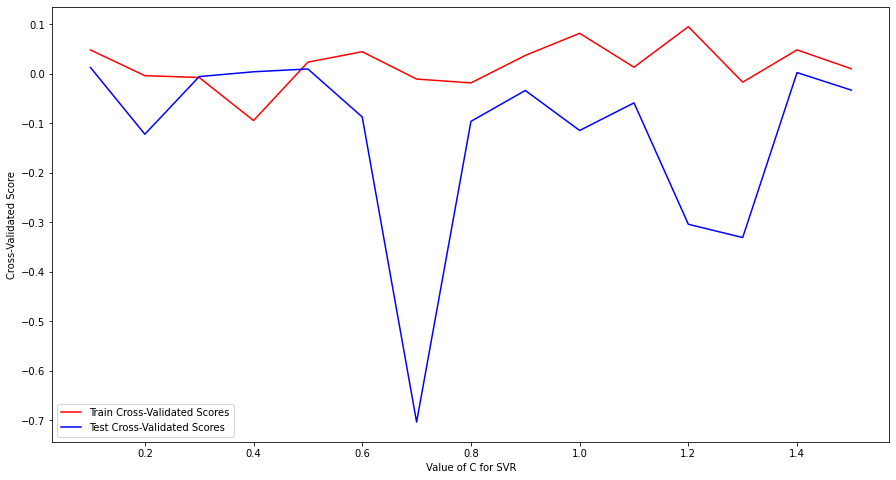

In [78]:
#plotting train and accuracy scores for Linear Kernel

C_range = list(np.arange(0.1,1.6,0.1))
plt.figure(figsize=(15,8))
plt.plot(C_range, svr_scores_train, color='red')
plt.xlabel('Value of C for SVR')
plt.ylabel('Cross-Validated Score')
plt.plot(C_range, svr_scores_test, color='blue')
plt.legend(['Train Cross-Validated Scores', 'Test Cross-Validated Scores'], loc='lower left')
plt.show()

In [79]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [80]:
#Using SVM Regressor after removing unimportant features with Sigmoid Kernel
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
i=1
for train_index, test_index in folds.split(X_scaled_new,Y_scaled):
    print("\n {} of KFold".format(i,folds.n_splits))
    X_scaled_train,X_scaled_test = X_scaled_new.iloc[train_index],X_scaled_new.iloc[test_index]
    Y_scaled_train,Y_scaled_test = Y_scaled.iloc[train_index],Y_scaled.iloc[test_index]
    knn.fit(X_scaled_train, Y_scaled_train)
    y_scaled_test_pred = knn.predict(X_scaled_test)

    print("PERFORMANCE FOR KNN Regressor")
    svr_scores = cross_val_score(knn, X_scaled_train, Y_scaled_train, cv=10)
    print("Mean cross validation score: {}".format(np.mean(svr_scores)))
    print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))
    i=i+1


 1 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.7915288554553521
R2-score:  0.8389155517246353

 2 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.8005779426486596
R2-score:  0.6524501897508636

 3 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.7891209931038574
R2-score:  0.8032080027060952

 4 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.7852434110256918
R2-score:  0.8213780566563236

 5 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.789470410986614
R2-score:  0.7943923836038024

 6 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.7796367633433172
R2-score:  0.8380943339386545

 7 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.7788488323352409
R2-score:  0.807980738077365

 8 of KFold
PERFORMANCE FOR KNN Regressor
Mean cross validation score: 0.7929225000965093
R2-score:  0.8241290964702518

 9 of KFold
PERFORMANCE FOR KNN R

In [81]:
error_rate = []
for i in range(1,140):
        knn.fit(X_scaled_train,Y_scaled_train)
        y_scaled_test_pred = knn.predict(X_scaled_test)
        y_scaled_test_pred = y_scaled_test_pred.reshape(146,1)
        error_rate.append(np.mean(y_scaled_test_pred != Y_scaled_test))

In [82]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scaled_train,Y_scaled_train)
    y_scaled_test_pred = knn.predict(X_scaled_test)
    y_scaled_test_pred = y_scaled_test_pred.reshape(146,1)
    error_rate.append(np.mean(y_scaled_test_pred != Y_scaled_test))

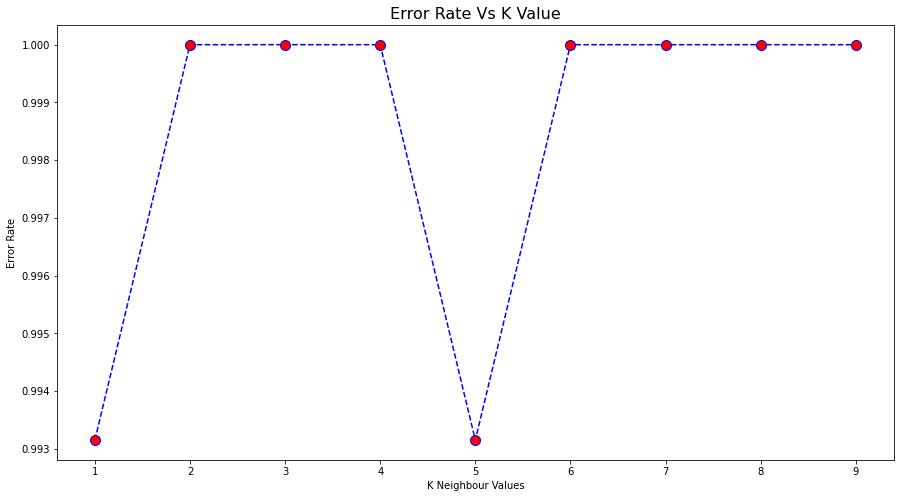

In [83]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate Vs K Value", fontsize=16)
plt.xlabel("K Neighbour Values")
plt.ylabel("Error Rate")
plt.show()

In [84]:
#Parameter tuning with GridSearchCV 
estimator_KNN = KNeighborsRegressor()
scoring = make_scorer(r2_score)
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (1,10,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'metric': ('minkowski', 'chebyshev')}
                   

grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = scoring,
    n_jobs = -1,
    cv = 5
)

In [85]:
KNN_1=grid_search_KNN.fit(X_scaled_train, Y_scaled_train)
y_pred_KNN1 =KNN_1.predict(X_scaled_test)

In [86]:
#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 

{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [87]:
print('Best Score - KNN:', grid_search_KNN.best_score_ )

Best Score - KNN: 0.7927797184165263


In [88]:
#predicting with best model params:
print("R2-score: ",r2_score(Y_scaled_test, y_pred_KNN1))

R2-score:  0.7825044362008384


In [89]:
#predicting with best model params:
KNN_best = KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski', n_neighbors=10, p=1, weights='distance')
KNN_best.fit(X_scaled_train,Y_scaled_train)
y_scaled_test_pred = KNN_best.predict(X_scaled_test)
print("R2-score: ",r2_score(Y_scaled_test, y_scaled_test_pred))

R2-score:  0.7825044362008384
